# PROJETO 2 - TITANIC

In [9]:
from IPython.display import Image
Image(url="http://guiadoscuriosos.uol.com.br/blog/wp-content/uploads/2012/04/titanic-olympic1.jpg")

# Introdução

Este projeto consiste na análise de uma planilha de dados contendo informações demográficas e de passageiros, de um total de 891 das 2224 pessoas a bordo do Titanic, que afundou em um trágico acidente. Abaixo seguem as questões a serem levantadas por estas análises estatísticas.

> ___Primeira Questão:___ **A taxa de sobrevivência da primeira classe foi superior com relação a segunda e a terceira classe?**

> ___Segunda Questão:___ **Há correlação direta entre sobrevivência e gênero?**

> ___Terceira Questão:___ **Mulheres e crianças Primeiro?**

**Verificando os dados**

Os dados contidos na tabela abaixo e a descrição de cada campo foram retirados do site Kaggle.

**Variáveis**

| Variável | Definição | Chave |
| -------- | --------- | :-----: |
| *Survival* | Sobreviviente | 0 = No / 1 = Yes |
| *Pclass*   | Bilhetes por classe | 1 = 1st / 2 = 2nd / 3 = 3rd |
| *Sex*      | Gênero | xxx |
| *Age*      | Idade em anos | xxx |
| *Sibsp*    | Irmãos/cônjuges a bordo do Titanic | xxx |
| *Parch*    | Pais/filhos a bordo do Titanic | xxx |
| *Ticket*   | Número do Ticket | xxx |
| *Fare*     | Tarifa de passageiro | xxx |
| *Cabin*    | Número de cabine | xxx |
| *Embarked* | Porta de embarque | C = Cherbourg, Q = Queenstown, S = Southampton |

**Notas das Variáveis**

**Pclass:** Classe (nível socio-econômico) dos viajantes a bordo.
1º = Primeira classe.
2º = Segunda classe.
3º = Terceira classe.

**Age:** A idade é fracionária se for menor que 1 inteiro. Se a idade for estimada, está na forma de xx.5

**Sibsp:** Conjunto de dados que define as relações familiares da seguinte forma:
*Sibling* = irmão, irmã, meio-irmão e meia-irmã.
*Spouse* = marido e esposa (amantes e fiancés foram ignorados).

**Parch:** Conjunto de dados que define as relações familiares da seguinte forma:
*Parent* = mãe e pai.
*Child* = filha, filho, enteada e enteado.

**Obs.:** Algumas crianças viajaram apenas com uma babá, portanto parch = 0 para eles. Também, alguns viajaram com amigos muito próximos ou vizinhos, no entanto, as definições não suportam tais relações. Outros familiares excluídos deste estudo incluem primos, sobrinhos, sobrinhas, tias, tios e sogros. 

# Dados


O conjunto de dados está contido dentro da seguinte planilha; __Titanic_data.csv__ e para usá-lo de forma eficiente, o converti em um Dataframe do Pandas. Foi impresso as primeiras linhas do Dataframe para visualização das colunas e tipos de variáveis.

In [2]:
import pandas as pd

# Primeiros registros da planilha
titanic_data = pd.read_csv("titanic_data.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Últimos registros da planilha
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Foram notados alguns valores NaN específicamente na coluna Age e Cabin e isso me faz pensar que talvez outras colunas também possam ter valores faltantes ocultos, o que pode (ou não) comprometer a análise dos dados.

As seguintes colunas foram retiradas do conjunto de dados; PassengerId, Name, Ticket, Fare, Cabin e Embarked. Por não serem relevantes nas análises a seguir, estes dados não serão considerados na investigações propostas neste trabalho.

In [4]:
# Retirar colunas não necessárias para análises estatísticas
titanic_data_cleaned = titanic_data.drop(['Name','Ticket','Cabin','Fare','Embarked'], axis=1)
titanic_data_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


# Análises Exploratórias

Logo abaixo foi gerado uma tabela com alguns dados descritivos como soma total por coluna, média, desvio padrão, valor mínimo e máximo por coluna e os quartis de 25, 50 e 75 porcento.

In [5]:
# Verificar estatística descritiva - média, desvio padrão e outros
## filtrei os nullos para que não atrapalhassem
titanic_data_cleaned[~titanic_data_cleaned.Age.isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000


A seguir verifiquei se haviam linhas inválidas nas colunas da tabela reduzida, pois como foi visto anteriormente, valores NaN poderiam estar ocultos e se faz necessário identificá-los.

Para contar as linhas inválidas, utilizei o método isnull() coluna a coluna, que retornou uma série booleana com valores _True_ onde haviam valores nulos e _False_ onde não haviam. E a partir disso, para somar os valores inválidos a função soma foi adicionada.

**Coluna Sobreviventes**

In [5]:
# Coluna Survived
titanic_data_cleaned.astype(bool)
print "Survived - contagem nula: ", titanic_data_cleaned["Survived"].isnull().sum()

Survived - contagem nula:  0


**Coluna Classe**

In [34]:
# Coluna Pclass
titanic_data_cleaned.astype(bool)
print "Pclass - contagem nula: ", titanic_data_cleaned["Pclass"].isnull().sum()

Pclass - contagem nula:  0


**Coluna Gênero**

In [35]:
# Coluna Sex (Gênero)
titanic_data_cleaned.astype(bool)
print "Sex - contagem nula: ", titanic_data_cleaned["Sex"].isnull().sum()

Sex - contagem nula:  0


**Coluna Idade**

In [36]:
# Coluna Age
titanic_data_cleaned.astype(bool)
print "Age - contagem nula: ", titanic_data_cleaned["Age"].isnull().sum()

Age - contagem nula:  177


A contagem nula acima me revelou o número de 177 linhas inválidas, o que representa um número significativo.
Em seguida subtraí a contagem nula do total de passageiros, sendo assim, ficando mais claro o total de números conhecidos presentes na coluna das idades.

In [37]:
known_age_passengers = titanic_data_cleaned.dropna(subset = ["Age"])
print "Total de passageiros: ", len(titanic_data_cleaned)
print "Total conhecidos: ", len(known_age_passengers)

Total de passageiros:  891
Total conhecidos:  714


**Coluna Irmãos / Cônjuges**

In [38]:
# Coluna Sibsp
titanic_data_cleaned.astype(bool)
print "SibSp - contagem nula: ", titanic_data_cleaned["SibSp"].isnull().sum()

SibSp - contagem nula:  0


**Coluna Pais / Filhos**

In [39]:
# Coluna Parch
titanic_data_cleaned.astype(bool)
print "Parch - contagem nula: ", titanic_data_cleaned["Parch"].isnull().sum()

Parch - contagem nula:  0


**Percentual de cada coluna**

In [40]:
# Percentual de valores nulos do total de registros
titanic_data_cleaned.isnull().sum()/len(titanic_data_cleaned)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
dtype: float64

A análise das contagens nulas revelou para a coluna Age o percentual de 19%, embora pareça significativo, não apresentará resultados muito discrepantes nas análises seguintes pois as colunas serão trabalhadas em conjunto e confrontadas entre si. Específicamente a coluna das idades não comprometerá as demais.

**Distribuição de passageiros**

Separar os sexos nos permite uma visualização clara dos fatos e o Dataframe abaixo mostra essa divisão.

Homens: 
577

Mulheres: 
314


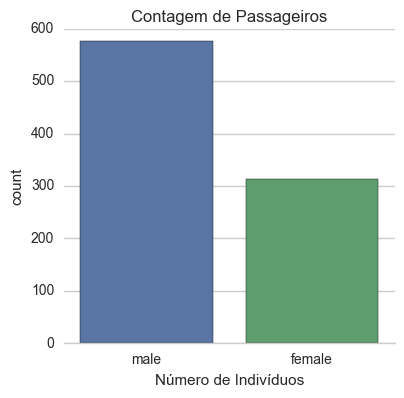

In [6]:
import matplotlib.pyplot as plt

# Puxar dados de passageiros
menData = titanic_data_cleaned[titanic_data_cleaned.Sex == "male"]
womenData = titanic_data_cleaned[titanic_data_cleaned.Sex == "female"]

# Contagem para Homens e Mulheres
print("Homens: ")
print(menData.count()["Sex"])

print("")

print("Mulheres: ")
print(womenData.count()["Sex"])

import seaborn as sns
sns.set_style("whitegrid")

# Grafico da população de Homens e Mulheres a bordo do Titanic
g = sns.factorplot(x='Sex', data=titanic_data_cleaned, kind='count')
g.despine(left=True)
g.set_xlabels(u"Número de Indivíduos")
plt.title(u'Contagem de Passageiros')
plt.show()


Observando a população de cada gênero, vemos claramente que a maioria é de homens a bordo. 

Logo mais abaixo, uma breve descrição do passageiro mais novo, o mais velho e a média de idade dos tripulantes.

In [42]:
# Passageiro mais novo
print("Passageiro mais novo: ")

Passageiro_mais_novo = titanic_data_cleaned['Age'].min()
print(Passageiro_mais_novo)

print("")

# Passageiro mais velho
print("Passageiro mais velho: ")
Passageiro_mais_velho = titanic_data_cleaned['Age'].max()
print(Passageiro_mais_velho)

print("")
# Idade média dos passageiros:
print("Média de idade dos passageiros: ")
Idade_media_dos_passageiros = titanic_data_cleaned['Age'].mean()
print(Idade_media_dos_passageiros)

Passageiro mais novo: 
0.42

Passageiro mais velho: 
80.0

Média de idade dos passageiros: 
29.6991176471


O passageiro mais velho possuía 80 anos e a idade média dos passageiros era de 29 anos. A descrição dos dados indica que a idade pode ser fracionária, ou seja, o passageiro mais novo registrado possuía menos de 1 ano e idade.

In [45]:
import numpy as np

# Revisão de alguns dados de idades faltantes
idade_falatante = pd.isnull(titanic_data_cleaned['Age'])

# Determinar o número exato de homens e mulheres com valores faltantes
mulher_idade_falt = titanic_data_cleaned[idade_falatante]['Sex'] == 'female'
homem_idade_falt = titanic_data_cleaned[idade_falatante]['Sex'] == 'male'
dados_idade = titanic_data_cleaned.dropna()
print 'Números exato de homens e mulheres com idades faltantes são {} e {} respectivamente'.format(mulher_idade_falt.sum(),homem_idade_falt.sum())

# Determinar a média de sobreviventes e não sobreviventes
media_idade_sobrev = dados_idade[dados_idade['Survived'] == True]['Age'].mean()
media_idade_mortos = dados_idade[dados_idade['Survived'] == False]['Age'].mean()

print 'Média de idade de sobreviventes {} \n\
Média de idade de mortos {}' \
.format(np.round(media_idade_sobrev), np.round(media_idade_mortos))

Números exato de homens e mulheres com idades faltantes são 53 e 124 respectivamente
Média de idade de sobreviventes 28.0 
Média de idade de mortos 31.0


Anteriormente foi levantado o número total dos valores nulos na coluna das idades, agora os valores exatos de nulos para homens e mulheres. Assim como a média das idades de sobreviventes e mortos. 

**Distribuição etária total de pessoas a bordo**

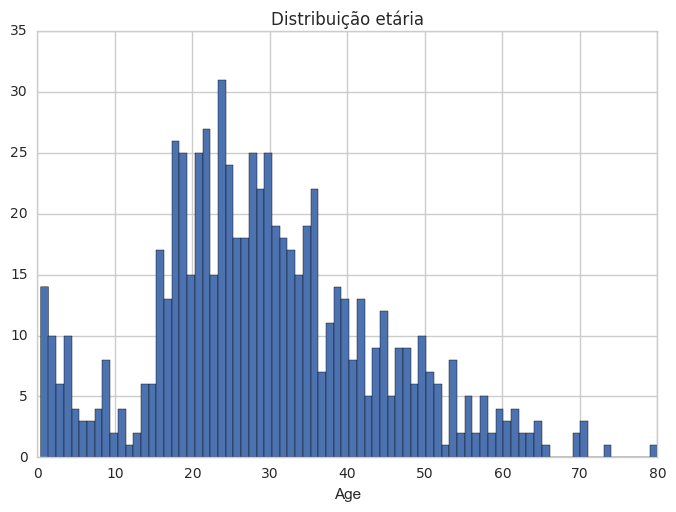

In [47]:
# Distribuição etária total
titanic_data_cleaned['Age'].hist(bins=80)
plt.title(u"Distribuição etária")
plt.xlabel('Age')
plt.show()

De acordo com os dados plotados no histograma, vemos que a maioria dos tripulantes, sem distinguir por genero, se encontram entre a faixa de 20 e 40 anos de idade.

A seguir foram levantados os dados para responder a primeira questão proposta para este trabalho.

# 1ª questão: A taxa de sobrevivência da primeira classe foi superior com relação a segunda e a terceira classe?

Abaixo, comparei a distribuição dos passageiros por sexo em cada classe antes da tragédia e como ficou a distribuição dos passageiros após a tragédia, e pela visualização gráfica responder a primeira questão proposta para o trabalho.

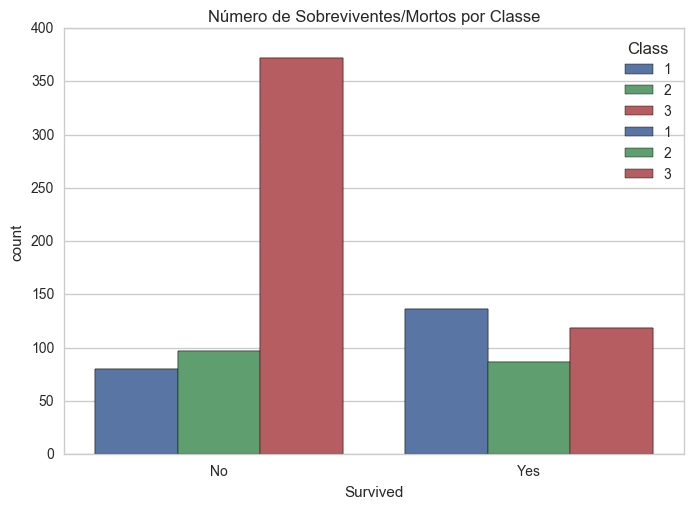

In [7]:
# Gráfico de sobreviventes e mortos por classe antes e depois da tragédia
titanic_data_cleaned['Survived'].replace({0:'No', 1:'Yes'}, inplace=True) #Obs.: replace - substitui tb para os próximos graf.
sns.countplot(x='Survived', data=titanic_data_cleaned, hue='Pclass')
plt.title(u'Número de Sobreviventes/Mortos por Classe')
plt.legend(title='Class')
plt.show()

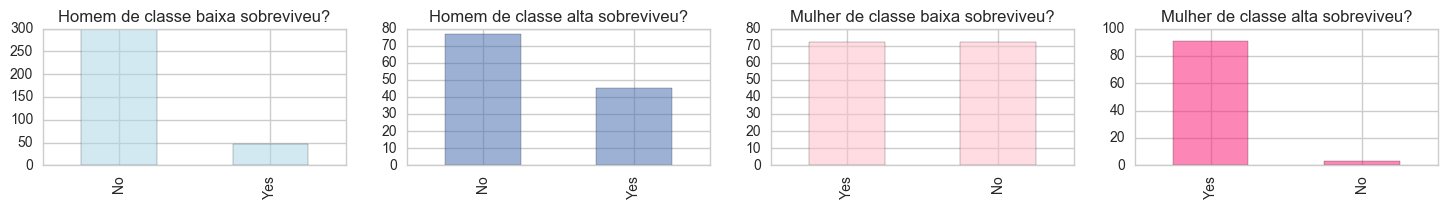

In [11]:
fig = plt.figure(figsize=(18,6))
female_color = "#FA2379"
alpha_bar_chart = 0.55

# Homem de classe baixa
fig.add_subplot(3,4,9)
titanic_data_cleaned.Survived[(titanic_data_cleaned.Sex == "male") & 
                              (titanic_data_cleaned.Pclass == 3)].value_counts().plot(kind='bar', color="lightblue", alpha=alpha_bar_chart)
plt.title(u"Homem de classe baixa sobreviveu?")

# Homem de classe alta
fig.add_subplot(3,4,10)
titanic_data_cleaned.Survived[(titanic_data_cleaned.Sex == "male") & 
                              (titanic_data_cleaned.Pclass == 1)].value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title(u"Homem de classe alta sobreviveu?")

# Mulher de classe baixa
fig.add_subplot(3,4,11)
titanic_data_cleaned.Survived[(titanic_data_cleaned.Sex == "female") & 
                              (titanic_data_cleaned.Pclass == 3)].value_counts().plot(kind='bar', color="pink", alpha=alpha_bar_chart)
plt.title(u"Mulher de classe baixa sobreviveu?")

# Mulher de classe alta
fig.add_subplot(3,4,12)
titanic_data_cleaned.Survived[(titanic_data_cleaned.Sex == "female") & 
                              (titanic_data_cleaned.Pclass == 1)].value_counts().plot(kind='bar', color=female_color, alpha=alpha_bar_chart)
plt.title(u"Mulher de classe alta sobreviveu?")

plt.show()

A distribuição dos passageiros anterior a tragédia mostra que a maioria dos homens e mulheres a bordo se encontravam na terceira classe, enquanto que na primeira e na segunda classe a divisão entre ambos os sexos eram relativamente parecidas e bem menor numericamente.

A distribuição após a tragédia evidencia que homens e mulheres da primeira classe obtiveram um acesso maior aos botes pois a quantidade de sobrevivêntes foi maior em comparação com a segunda e a terceira classe, respondendo assim a primeira questão deste trabalho. 

De forma geral, os homens e mulheres de classe baixa tiveram menos possibilidade de sobrevivência com relação aos que estavam nas elites do navio, como evidenciado no segundo gráfico.

# 2ª questão: Há correlação direta entre sobrevivência e gênero?

** Resumo do total de pessoas, sobreviventes e mortos**

In [34]:
# Total, Sobreviventes e Mortos por gênero
print("Homem: ")
print(menData.count()['Sex'], menData[menData.Survived == 1].count()['Sex'], menData[menData.Survived == 0].count()['Sex'])
print("")

print("Mulher: ")
print(womenData.count()['Sex'], womenData[womenData.Survived == 1].count()['Sex'], womenData[womenData.Survived == 0].count()['Sex'])
print("")

print("Total geral: ")
print(titanic_data_cleaned.count()['Sex'])

Homem: 
(577, 109, 468)

Mulher: 
(314, 233, 81)

Total geral: 
891


O resumo acima será usado como base para uma análise de teste estatístico, como forma de validação dos resultados. Os seguintes parâmetros para as variáveis dependentes e independentes foram propostos:

>_Variável independente:_ medição de condição relacional entre gênero e sobrevivência na tragédia do Titanic.

>_Variável dependente:_ demonstração de correlação direta entre genêro e sobrevivência na tragédia do Titanic.

Para o gênero e sobrevivência, usarei a função stats.chi2_contingency() do scipy para aplicar um teste Qui-Quadrado de independência para as duas variáveis da mesma população. O conjunto de hipóteses apropriado para essa tarefa seria; verificar Hipótese Nula para uma possível não correlação entre o fator sobrevivência e o sexo do indivíduo ou Hipótese Alternativa para correlação direta entre o fator sobrevivência e o sexo do indivíduo.

Para o levantamento dos resultados as seguintes hipóteses foram propostas:

>_Hipótese nula:_ não há diferença significativa entre gênero e sobrevivência, isto é, não há correlação entre o fator sobrevivência e o sexo do indivíduo.

>_Hipótese Alternativa:_ há correlação direta entre o fator sobrevivência e o sexo do indivíduo.

In [12]:
import scipy as sp

menSurvived = menData[menData.Survived == 1].count()['Sex']
menDied = menData[menData.Survived == 0].count()['Sex']
womenSurvived = womenData[womenData.Survived == 1].count()['Sex']
womenDied = womenData[womenData.Survived == 0].count()['Sex']

# Tabela para cálculo do qui-quadrado
men_women_survival = np.array([[menSurvived, menDied],[womenSurvived, womenDied]])
print(men_women_survival)

# Qui-quadrado
sp.stats.chi2_contingency(men_women_survival)

[[109 468]
 [233  81]]


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 221.47474747,  355.52525253],
        [ 120.52525253,  193.47474747]]))

Assim temos

> 1º valor - qui-quadrado: 260.71702016732104

> 2º valor - p-value: 1.1973570627755645e-58

> 3º valor - graus de liberdade: 1

> 4º valor - frequências esperadas de célula por Hipótese nula:

> Homem - Sobreviventes: 221.47474747 / Mortos: 355.52525253

> Mulher - Sobreviventes: 120.52525253 / Mortos: 193.47474747


Para entender melhor os dados de saída do Scipy decidi gerar novos resultados através do site graphpad.com, analisando uma tabela de contingência 2x2.

| Gênero | Sobreviventes | Mortos |
| :----: | :-----------: | :----: |
| _Homem_ | 109 | 468 |
| _Mulher_ | 233 | 81 |

Duas abordagens foram utilizadas, Teste exato de Fisher e Correção de Yates. É importante ressaltar que para a configuração de colunas e linhas para tabelas 2x2 o grau de liberdade é determinado pelo Número de Colunas (numéricas) - 1 vezes o Número de linhas (numéricas) - 1, ou seja, na tabela acima temos:

> Colunas = 2 - 1 = 1

> Linhas = 2 - 1 = 1

> Colunas x Linhas = 1 x 1 = 1 (grau de liberdade)

Uma tabela de contingência cruzada 2x2 apresenta as frequências de ocorrência de todas as combinações dos níveis de duas variáveis dicotômicas. O resultados encontrados entre ambas as abordagens se igualam ao resultado gerado pelo Scipy, com relação ao Qui-Quadrado 260.717 para o grau de liberdade 1 e o nível de significância 0.05, mas também gera um p-value para duas caudas menor do que 0.0001 e isto nos dá um resultado considerado extremamente significativo, indicando que há uma associação entre gênero e sobrevivência no naufrágio do navio.

Sendo assim, podemos rejeitar a hipótese nula e aceitar a hipótese alternativa que diz que há correlação direta entre o fator sobrevivência e o sexo do indivíduo, respondendo a segunda questão proposta para o trabalho.

# 3ª questão: Mulheres e crianças primeiro?

Em uma entrevista dada para a revista eletrônica Hype Science em janeiro de 2012, Rob Ashdown, diretor de operações do Conselho de Cruzeiros Europeu, explica que após o embarque dos passageiros, eles são indicados para um bote salva vidas de acordo com sua cabine. Sugere também que “a ideia de mulheres e crianças primeiro é apenas uma convenção que existe por razões históricas. Pode ser apropriado em certas circunstâncias e culturas, mas não em todos os lugares.”

De acordo com uma pesquisa rápida sobre o tema e também o artigo mencionado acima, não é via de regra mulheres e crianças terem prioridade no acesso aos botes de fuga em tragédias como a do Titanic. Então, primeiro, fui verificar a taxa percentual de sobrevivência por gênero para saber se as mulheres tiveram prioridade de acesso aos botes salva vidas com relação aos homens. E, segundo, se as crianças tiveram prioridade de acesso aos botes com relação aos adultos, estipulando faixas etárias por escalas de 13 em 13.

**Percentual de sobrevivência por gênero de acordo com as classes**

In [12]:
# Percentual de sobrevivência - (0) mortos / (1) sobreviventes
titanic_grouped.unstack().div(titanic_data_cleaned.groupby(['Pclass', 'Sex']).size(), axis = 0).stack()

Pclass  Sex     Survived
1       female  0           0.031915
                1           0.968085
        male    0           0.631148
                1           0.368852
2       female  0           0.078947
                1           0.921053
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
dtype: float64

A taxa percentual de sobrevivência foi cerca de 97% para as mulheres e 37% para os homens da primeira classe. Para a segunda classe as mulheres tiveram uma taxa de 92% enquanto que os homens, foi de apenas 16%. E por fim, a terceira classe apresentou uma taxa de 50% de sobrevivência para as mulheres e para os homens somente 13%.


In [11]:
# Quantidade de passageiros agrupados por classe, sexo e sobrevivência
titanic_grouped = titanic_data_cleaned.groupby(['Pclass', 'Sex', 'Survived']).size()
titanic_grouped

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64

As mulheres sobreviveram em quantidade muito superior aos homens, no geral, somando as três classes sociais são 233 mulheres para 109 homens, evidenciando a prioridade quanto ao acesso aos botes.

Abaixo foi calculado a proporção de sobrevivência por faixa etária com foco no grupo de 0 à 13 anos.

**Probabilidade de sobrevivência de crianças com idade até 13 anos**

Como visto anteriormente, o gênero feminino sobreviveu significativamente mais que o gênero masculino, mas agora é interessante verificar se além das mulheres, as crianças também exerceram, de fato, prioridade quanto ao acesso aos botes salva vidas. 
Decidi estipular a faixa de 0 à 13 anos para as crianças e dividir as outras faixas etárias no mesmo padrão de escala. 

Distribuir o total de pessoas por faixas etárias agrupadas de 13 em 13 anos e verificar a proporção de sobrevivência dos grupos foi a maneira mais interessante por mim encontrada, afim de saber as chances que os mais novos tiveram.

In [17]:
range(0, 81, 13)

[0, 13, 26, 39, 52, 65, 78]

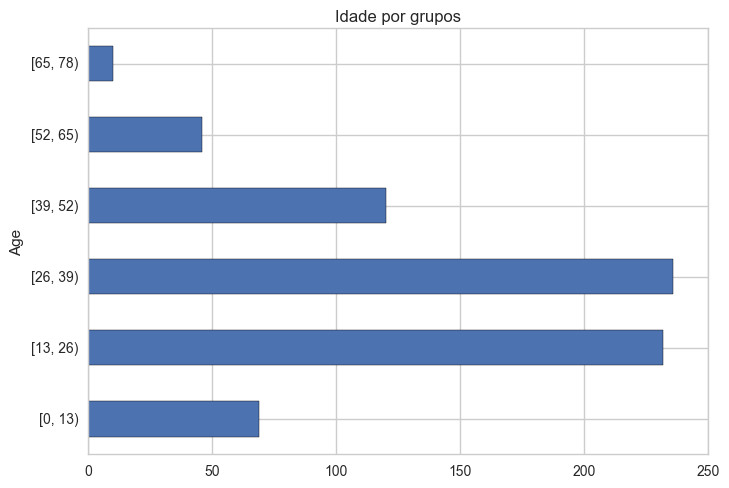

In [9]:
titanic_data_cleaned['Age'] = pd.cut(titanic_data_cleaned.Age, range(0, 81, 13), right=False)
titanic_data_cleaned.groupby(['Age']).size().plot(kind='barh',stacked=True)
plt.title('Idade por grupos')
plt.show()

In [10]:
#Proporção de sobrevivência pelo fator grupo - idade
print titanic_data_cleaned.groupby(['Age']).Survived.mean()
plt.show()

Age
[0, 13)     0.579710
[13, 26)    0.362069
[26, 39)    0.423729
[39, 52)    0.383333
[52, 65)    0.413043
[65, 78)    0.000000
Name: Survived, dtype: float64


Pelo fator de sobrevivência dividido por faixa etária, o grupo de 0 à 13 anos possui uma proporção de sobrevida superior aos demais grupos.

Assim como foi confirmado que as mulheres tiveram privilégio quanto ao acesso aos botes salva vidas, as crianças também usufruíram da mesma vantagem. As três questões propostas foram respondidas com êxito dentro da capacidade de análise (que ainda é muito superficial) e habilidade do uso da ferramenta IPython apresentada pelo autor, cabendo análises mais detalhadas e questões mais aprofundadas futuramente.

**Métodos e questões futuras**

Algumas técnicas e ferramentas de aprendizado de máquina são bem comuns no processo de reconhecimento de um banco de dados e, consequentemente, no auxílio na tomada de decisões. Futuramente, a utilização da Árvore de Decisão poderia ser um método para uma abordagem mais ampla, assim como modelagem preditiva através de algoritmo como Random Forest, matriz de confusão e estratégias de validação cruzada para maior confiabilidade dos resultados. 

Algumas questões trariam um entendimento maior quanto as variáveis envolvidas em meio a tão famosa tragédia que foi o naufrágio do Titanic, questões como;

* Mulheres com crianças (filhos ou acompanhantes) teriam uma taxa de sobrevivência melhor vs mulheres sem crianças?

* Quais seriam as taxa de sobrevivência em diferentes plataformas do navio?

* Qual a previsão de que todos os passageiros do sexo feminino e masculino com menos de 10 anos sobreviveram?

# Conclusão

Fatores limitantes como a falta de valores em algumas colunas geram um certo desconforto quanto a acuracidade das análises de forma global.
A ausência de equívocos e erros, de certa forma é inevitável, visto que este trabalho se trata de uma introdução para uma área estatística bem mais abrangente.

As principais conclusões desta análise são as seguintes:

• _A taxa de sobrevivência da primeira classe foi superior com relação a segunda e a terceira classe?_

Sim, através da visualização gráfica do antes e o depois do acidente, fica claro que homens e mulheres da primeira classe obtiveram acesso maior aos botes pois a quantidade de sobreviventes foi maior em comparação com a segunda e a terceira classe, respondendo assim a primeira questão deste trabalho.

• _Há correlação direta entre sobrevivência e gênero?_

Sim, de acordo com o teste estatístico realizado a hipótese nula foi rejeitada e a hipótese alternativa, que diz que há correlação direta entre o fator sobrevivência e o sexo do indivíduo, foi aceita.

• _Mulheres e crianças primeiro?_

Sim, em comparação com os homens, as mulheres tiveram uma taxa de sobrevivência bem superior no geral e também entre os gêneros dentro das três classes sociais e de acordo com as faixas etárias, o grupo de 0 à 13 anos de idade obtiveram os maiores índices de sobrevivência independentemente do sexo ou classe social.

In [17]:
from IPython.display import Image
Image(url="https://s3-us-west-2.amazonaws.com/dglunz/yes_rose.gif")

# Referências Bibliográficas

ARKHAM. Repository. Disponível em: <https://github.com/Arkham/jack-dies/blob/master/visualize_gender.py> Acesso em: 04 mai. 2017.

Gif animado Yes Rose. Disponível em: <https://s3-us-west-2.amazonaws.com/dglunz/yes_rose.gif> Acesso em: 10 abr. 2017.

Imagem do Titanic. Disponível em: <http://guiadoscuriosos.uol.com.br/blog/wp-content/uploads/2012/04/titanic-olympic1.jpg> Acesso em: 20 mar. 2017.

JASONICARTER. TitanicData.ipynb. Github. Disponível em: <https://github.com/jasonicarter/DAND_Titanic_Data_Analysis/blob/master/TitanicData.ipynb> Acesso em: 24 mar. 2017.

NGLGZZ. Investigate a Dataset : Titanic. Github. Disponível em: <https://github.com/nglgzz/titanic/blob/master/titanic.ipynb> Acesso em: 23 mar. 2017.

QuickCalcs. Analyze a 2x2 contingency table, Graphpad.com. Disponível em: <https://graphpad.com/quickcalcs/contingency1.cfm> Acesso em: 27 mar. 2017.

SDIEPEND. Investigate A Dataset - Titanic.ipynb. Github. Disponível em: <https://github.com/sdiepend/Udacity-DAND/blob/master/P2%20-%20Investigate%20a%20Dataset/Investigate%20A%20Dataset%20-%20Titanic.ipynb> Acesso em: 23 mar. 2017.

SDPENALOZA. Project 2 - Titanic Data. Disponível em: <https://nbviewer.jupyter.org/github/CtheDataIO-sdpenaloza/P2-Investigate-a-Dataset-Udacity/blob/master/Project_2_-_Titanic_Data_Rev3.pdf> Acesso em: 23 mar. 2017.

STAUT, Bernardo. Artigo: Mulheres e crianças primeiro são realmente regras marítimas?. Hype Science, Revista Eletrônica, 2012. Disponível em: <http://hypescience.com/mulheres-e-criancas-primeiro-costa-concordia-e-as-leis-para-evacuar-um-navio/> Acesso em: 22 mar. 2017.

TSUZUKITOMOAKI. Titanic_Survival_Exploration.ipynb. Github. Disponível em: <https://github.com/tsuzukit/ml-nanodegree-titanic/blob/master/Titanic_Survival_Exploration.ipynb> Acesso em: 23 mar. 2017.